In [61]:
import pickle
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
from collections import OrderedDict

In [62]:
joints_history_path = Path("../cache/joint_histories/pullup_squats_ktps_joints.pickle")

with open(joints_history_path, 'rb') as f:
    joints_history = pickle.load(f)

extremas_path = Path("../cache/extremas/pullup_squats_extrema.pickle")

with open(extremas_path, 'rb') as f:
    extremas = pickle.load(f)

In [63]:
len(joints_history["knee_right"])

836

In [64]:
extremas

defaultdict(list,
            {'pullup': [[{'rep': 0,
                'top': 26,
                'bottom': 72,
                'invalidated': False},
               {'rep': 1, 'top': 142, 'bottom': 199, 'invalidated': False},
               {'rep': 2, 'top': 279, 'bottom': 329, 'invalidated': False}]],
             'squat': [[{'rep': 0,
                'top': 10,
                'bottom': 372,
                'invalidated': False}]]})

In [66]:
def simple_moving_average(data, window_size):
  if window_size <= 0:
    raise ValueError("Window size must be a positive integer.")

  moving_averages = []
  for i in range(len(data) - window_size + 1):
    window = data[i : i + window_size]
    average = sum(window) / window_size
    moving_averages.append(average)

  return moving_averages

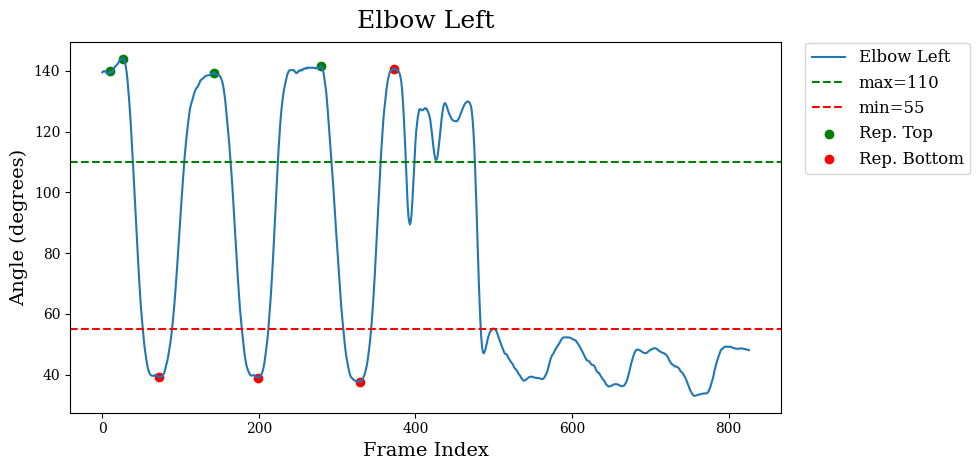

In [75]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

window_size = 10

joint_y = joints_history['elbow_left']
joint_sma_y = np.array(simple_moving_average(joint_y, window_size))

plt.figure().set_figwidth(10)
plt.plot(np.array(joint_sma_y), label="Elbow Left")

plt.axhline(
    y=110,
    color='g',
    linestyle='--',
    label='max=110'
)

plt.axhline(
    y=55,
    color='r',
    linestyle='--',
    label='min=55'
)

for extrema in extremas['pullup'][0]:
  plt.scatter(
    np.array(extrema['top']),
    np.array(joint_sma_y)[np.array(extrema['top'])],
    color='green', 
    label='Rep. Top'
  )

  if 'bottom' in extrema:
    plt.scatter(
        np.array(extrema['bottom']),
        np.array(joint_sma_y)[np.array(extrema['bottom'])],
        color='red', 
        label='Rep. Bottom'
    )

for extrema in extremas['squat'][0]:
  plt.scatter(
    np.array(extrema['top']),
    np.array(joint_sma_y)[np.array(extrema['top'])],
    color='green', 
    label='Rep. Top'
  )

  if 'bottom' in extrema:
    plt.scatter(
        np.array(extrema['bottom']),
        np.array(joint_sma_y)[np.array(extrema['bottom'])],
        color='red', 
        label='Rep. Bottom'
    )

plt.title("Elbow Left", fontsize=18, pad=10)
plt.xlabel('Frame Index', fontsize=14)
plt.ylabel('Angle (degrees)', fontsize=14)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    loc='upper center',
    bbox_to_anchor=(1.15, 1.02),
    fancybox=True,
    fontsize=12
)

# Save the plot
plt.tight_layout()
output_path = "elbow_left_pullup_squat.pdf"
plt.savefig(output_path)